<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/S%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from numpy import array
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


In [33]:
resturantreviews = pd.read_excel("Book1.xlsx")
resturantreviews.isnull().values.any()
resturantreviews.shape

(1000, 2)

In [34]:
resturantreviews.head()

,text,label
0,Wow... Loved this place.,Positive
1,Crust is not good.,Negative
2,Not tasty and the texture was just nasty.,Negative
3,Stopped by during the late May bank holiday of...,Positive
4,The selection on the menu was great and so wer...,Positive


In [35]:
resturantreviews["text"][3]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

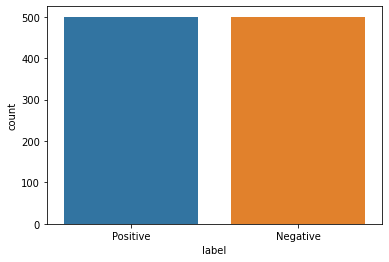

In [36]:
import seaborn as sns
sns.countplot(x='label', data=resturantreviews)
plt.show()

In [39]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [40]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [54]:
X = []
sentences = list(resturantreviews['text'])
for sen1 in sentences:
    X.append(preprocess_text(str(sen1)))

In [77]:
y = resturantreviews['label']
y = np.array(list(map(lambda x: 1 if x=="Positive" else 0, y)))
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [79]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [80]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [81]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [82]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [83]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [84]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          178100    
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 188,101
Trainable params: 10,001
Non-trainable params: 178,100
_________________________________________________________________
None


In [85]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
5/5 [==============================] - 1s 42ms/step - loss: 0.6919 - acc: 0.4938 - val_loss: 0.7073 - val_acc: 0.4688
Epoch 2/6
5/5 [==============================] - 0s 10ms/step - loss: 0.6513 - acc: 0.6219 - val_loss: 0.6851 - val_acc: 0.5500
Epoch 3/6
5/5 [==============================] - 0s 10ms/step - loss: 0.6175 - acc: 0.7109 - val_loss: 0.6839 - val_acc: 0.5875
Epoch 4/6
5/5 [==============================] - 0s 10ms/step - loss: 0.5895 - acc: 0.7437 - val_loss: 0.6811 - val_acc: 0.6187
Epoch 5/6
5/5 [==============================] - 0s 10ms/step - loss: 0.5646 - acc: 0.7781 - val_loss: 0.6753 - val_acc: 0.6187
Epoch 6/6
5/5 [==============================] - 0s 10ms/step - loss: 0.5442 - acc: 0.8078 - val_loss: 0.6707 - val_acc: 0.6125


In [86]:
score = model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 2ms/step - loss: 0.6364 - acc: 0.6850


In [87]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6363883018493652
Test Accuracy: 0.6850000023841858


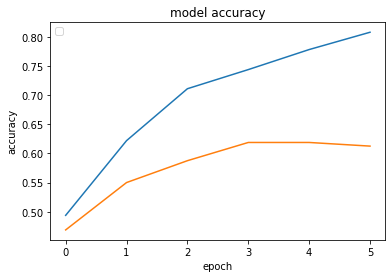

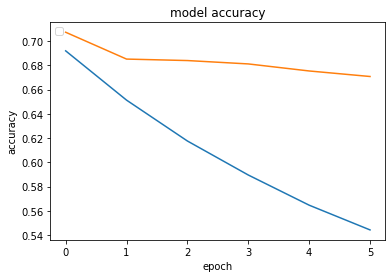

In [95]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

LSTM EVRİŞİMLİ SİNİR AĞLARI SINIFLANDIRMA

In [97]:

from keras.layers import Conv1D
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [98]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          178100    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 242,357
Trainable params: 64,257
Non-trainable params: 178,100
_________________________________________________________________
None


In [100]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
5/5 [==============================] - 2s 227ms/step - loss: 0.7075 - acc: 0.5422 - val_loss: 0.6764 - val_acc: 0.6125
Epoch 2/6
5/5 [==============================] - 1s 197ms/step - loss: 0.6060 - acc: 0.6703 - val_loss: 0.6813 - val_acc: 0.6375
Epoch 3/6
5/5 [==============================] - 1s 105ms/step - loss: 0.5142 - acc: 0.7859 - val_loss: 0.6009 - val_acc: 0.6687
Epoch 4/6
5/5 [==============================] - 1s 183ms/step - loss: 0.4509 - acc: 0.8125 - val_loss: 0.5878 - val_acc: 0.6500
Epoch 5/6
5/5 [==============================] - 1s 167ms/step - loss: 0.4006 - acc: 0.8703 - val_loss: 0.5712 - val_acc: 0.6313
Epoch 6/6
7/7 [==============================] - 0s 10ms/step - loss: 0.5564 - acc: 0.6950


In [101]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5564059615135193
Test Accuracy: 0.6949999928474426


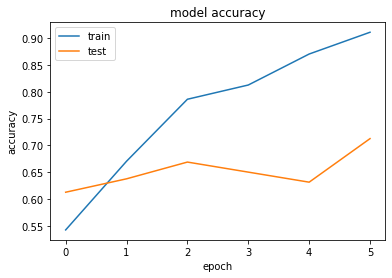

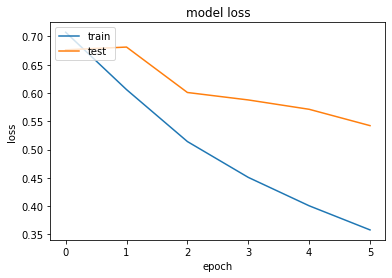

In [102]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

TEKRARLAYAN SİNİR AĞI MODELİ İLE METİN SINIFLANDIRMA

In [106]:
from tensorflow.keras.layers import LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [107]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          178100    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 295,477
Trainable params: 117,377
Non-trainable params: 178,100
_________________________________________________________________
None


In [108]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
5/5 [==============================] - 5s 469ms/step - loss: 0.6931 - acc: 0.5125 - val_loss: 0.6943 - val_acc: 0.4563
Epoch 2/6
5/5 [==============================] - 2s 329ms/step - loss: 0.6928 - acc: 0.5172 - val_loss: 0.6950 - val_acc: 0.4563
Epoch 3/6
5/5 [==============================] - 2s 330ms/step - loss: 0.6929 - acc: 0.5172 - val_loss: 0.6966 - val_acc: 0.4563
Epoch 4/6
5/5 [==============================] - 2s 436ms/step - loss: 0.6926 - acc: 0.5172 - val_loss: 0.6964 - val_acc: 0.4563
Epoch 5/6
5/5 [==============================] - 3s 543ms/step - loss: 0.6926 - acc: 0.5172 - val_loss: 0.6968 - val_acc: 0.4563
Epoch 6/6
7/7 [==============================] - 0s 49ms/step - loss: 0.6951 - acc: 0.4800


In [109]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.695136308670044
Test Accuracy: 0.47999998927116394


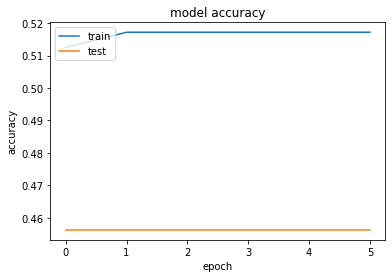

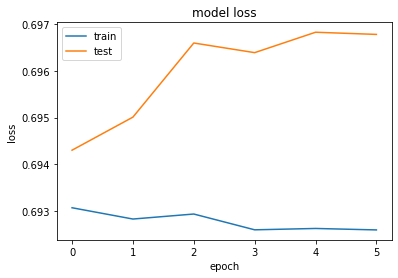

In [110]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [122]:
instance = X[60]
print(instance)

At least think to refill my water before struggle to wave you over for minutes 


In [123]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

1/1 [==============================] - 0s 25ms/step


array([[0.48266202]], dtype=float32)